<a href="https://colab.research.google.com/github/DommiiUdomp/Dommii/blob/main/IntroML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_moons, make_circles

# **Least Square Line**

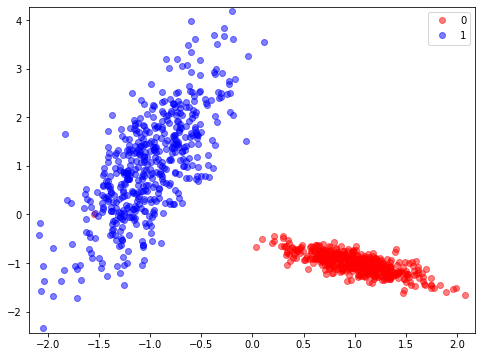

In [42]:
#Create Data Example
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                           n_informative=2, random_state=7, n_clusters_per_class=1)

figsize = (8, 6)
plt.figure(figsize=figsize)
plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
plt.legend()

LR coefficients: [[-4.09049818  2.07274152]]
LR intercept: [-0.27800528]


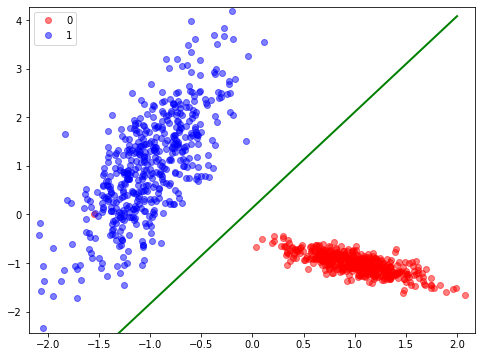

In [53]:
from sklearn.linear_model import LogisticRegression
# LogisticRegression classifier available in scikit-learn
lr = LogisticRegression()
lr.fit(X, y)
print('LR coefficients:', lr.coef_)
print('LR intercept:', lr.intercept_)
figsize = (8, 6)
plt.figure(figsize=figsize)
plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
plt.legend()

limits = np.array([-2, 2])
boundary = -(lr.coef_[0][0] * limits + lr.intercept_[0]) / lr.coef_[0][1]
plt.plot(limits, boundary, "g-", linewidth=2)

In [56]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

LR coefficients: [[-3.96688648  2.26129135]]
LR intercept: [-0.16230398]


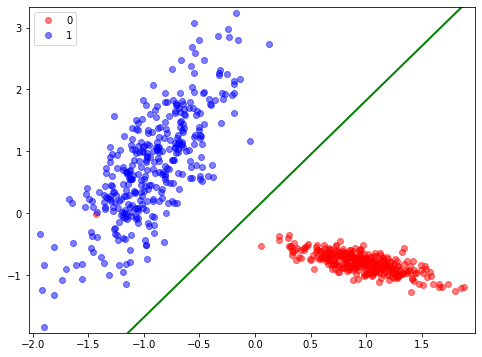

In [58]:
lr.fit(X_train, y_train)
print('LR coefficients:', lr.coef_)
print('LR intercept:', lr.intercept_)
figsize = (8, 6)
plt.figure(figsize=figsize)
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'or', alpha=0.5, label=0)
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], 'ob', alpha=0.5, label=1)
plt.xlim((min(X_train[:, 0])-0.1, max(X_train[:, 0])+0.1))
plt.ylim((min(X_train[:, 1])-0.1, max(X_train[:, 1])+0.1))
plt.legend()

limits = np.array([-2, 2])
boundary = -(lr.coef_[0][0] * limits + lr.intercept_[0]) / lr.coef_[0][1]
plt.plot(limits, boundary, "g-", linewidth=2)

In [86]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [87]:
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


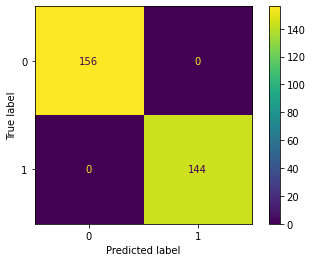

In [89]:
confusion_matrix(y_test,y_pred)
plot_confusion_matrix(lr,X_test,y_test)

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00       144

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [91]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [96]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [97]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l1'}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


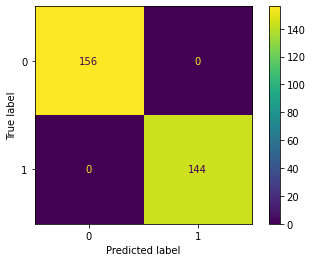

In [98]:
y_pred = grid_model.predict(X_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
plot_confusion_matrix(grid_model,X_test,y_test)

# **Ridge Regression**

In [59]:
from sklearn.linear_model import Ridge

In [62]:
from sklearn.metrics import mean_squared_error

In [71]:
#Fit
Rid = Ridge(alpha=1)
Rid.fit(X_train,y_train)
y_pred = Rid.predict(X_test)
#Evaluation
mean_squared_error(y_test,y_pred)

0.016937058463992644

**Cross Validation**

In [72]:
from sklearn.model_selection import cross_val_score

In [74]:
sc = cross_val_score(Rid,X_train,y_train,
                         scoring='neg_mean_squared_error',cv=5)
sc

array([-0.02068433, -0.01579749, -0.01456761, -0.01342985, -0.01444142])

In [75]:
from sklearn.model_selection import cross_validate

In [76]:
scores = cross_validate(Rid,X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','max_error'],cv=5)
scores

{'fit_time': array([0.00162077, 0.00224209, 0.0007956 , 0.00077677, 0.00089264]),
 'score_time': array([0.00170064, 0.00084734, 0.00077128, 0.00082493, 0.001055  ]),
 'test_max_error': array([-1.0396065 , -0.36798906, -0.36084595, -0.41106098, -0.36901751]),
 'test_neg_mean_absolute_error': array([-0.09924935, -0.10068874, -0.0949921 , -0.08687526, -0.09258549]),
 'test_neg_mean_squared_error': array([-0.02068433, -0.01579749, -0.01456761, -0.01342985, -0.01444142])}

In [77]:
pd.DataFrame(scores)

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_max_error
0,0.001621,0.001701,-0.099249,-0.020684,-1.039607
1,0.002242,0.000847,-0.100689,-0.015797,-0.367989
2,0.000796,0.000771,-0.094992,-0.014568,-0.360846
3,0.000777,0.000825,-0.086875,-0.013430,-0.411061
4,0.000893,0.001055,-0.092585,-0.014441,-0.369018


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [81]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [82]:
base_elastic_model = ElasticNet()
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [83]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

# **KNN**

In [99]:
from sklearn.datasets import make_classification, make_moons, make_circles

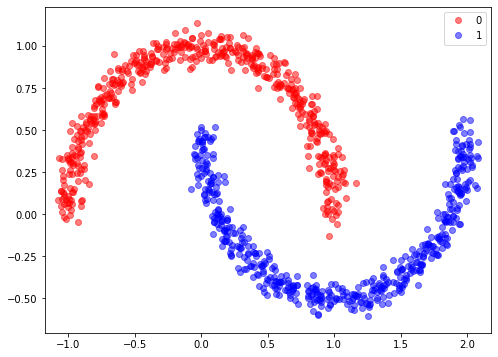

In [100]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=0)

figsize = (8, 6)
plt.figure(figsize=figsize)
plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
plt.legend()

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [105]:
y_pred = knn_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       163

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

